In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Đọc dữ liệu từ file Excel
data = pd.read_excel('DATA LAPTOP.xlsx')

In [3]:
data.dtypes

Name        object
Brand       object
CPU         object
RAM          int64
STORAGE      int64
VGA         object
SCREEN     float64
Price        int64
Store       object
LINK        object
dtype: object

In [4]:
data

,Name,Brand,CPU,RAM,STORAGE,VGA,SCREEN,Price,Store,LINK
0,MacBook Air M1 256GB 2020 I Chính hãng Việt Nam,Macbook,M1,8,256,Onboard,13.3,18490000,CellPhoneS,https://cellphones.com.vn/macbook-air-2020-m1....
1,Macbook Air M2 2022 8GB 256GB I Chính hãng Việ...,Macbook,M2,8,256,M2,13.0,27890000,CellPhoneS,https://cellphones.com.vn/macbook-air-m2-2022....
2,Asus Gaming Rog Strix G15 G513IH HN015W,Asus,AMD Ryzen 7,8,512,GTX 1650,14.0,17990000,CellPhoneS,https://cellphones.com.vn/laptop-asus-gaming-r...
3,Mac mini M2 2023 (8 CPU - 10 GPU - 8GB - 256GB...,Macbook,M2,8,256,M2,16.0,14790000,CellPhoneS,https://cellphones.com.vn/mac-mini-m2-2023.html
4,Lenovo Ideapad Gaming 3 15ARH7,Lenovo,AMD Ryzen 5,8,512,RTX 3050,15.6,21990000,CellPhoneS,https://cellphones.com.vn/laptop-lenovo-ideapa...
...,...,...,...,...,...,...,...,...,...,...
2079,Asus Vivobook Go 14 E1404FA-NK113W,Asus,AMD Ryzen 3,8,256,AMD Radeon Graphics,14.0,10990000,Hoàng Minh,https://laptopworld.vn/laptop-asus-vivobook-go...
2080,HP 15s-fq2712TU 7C0X2PA,HP,Core i3,8,256,Intel UHD,15.6,10190000,Hoàng Minh,https://laptopworld.vn/hp-15s-fq2712tu-7c0x2pa...
2081,Asus X515EA-BQ2351W,Asus,Core i3,4,512,Intel UHD,15.6,9990000,Hoàng Minh,https://laptopworld.vn/laptop-asus-x515ea-bq23...
2082,HP 14s-dq2644TU 7C0W6PA,HP,Core i3,8,256,Intel UHD,14.0,9990000,Hoàng Minh,https://laptopworld.vn/hp-14s-dq2644tu-7c0w6pa...


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Name"] = le.fit_transform(data["Name"])
data["Brand"] = le.fit_transform(data["Brand"])
data["CPU"] = le.fit_transform(data["CPU"])
data["VGA"] = le.fit_transform(data["VGA"])
#data["Store"] = le.fit_transform(data["Store"])
#data["Link"] = le.fit_transform(data["Link"])


In [6]:
# Tách dữ liệu thành đặc trưng (X) và biến mục tiêu (y)
X = data[['Name','Brand', 'CPU', 'RAM', 'STORAGE', 'SCREEN']]
y = data['Price']

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4800\2732219495.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= sns.heatmap(data.corr(),annot=True,fmt="g",cmap="Greens")


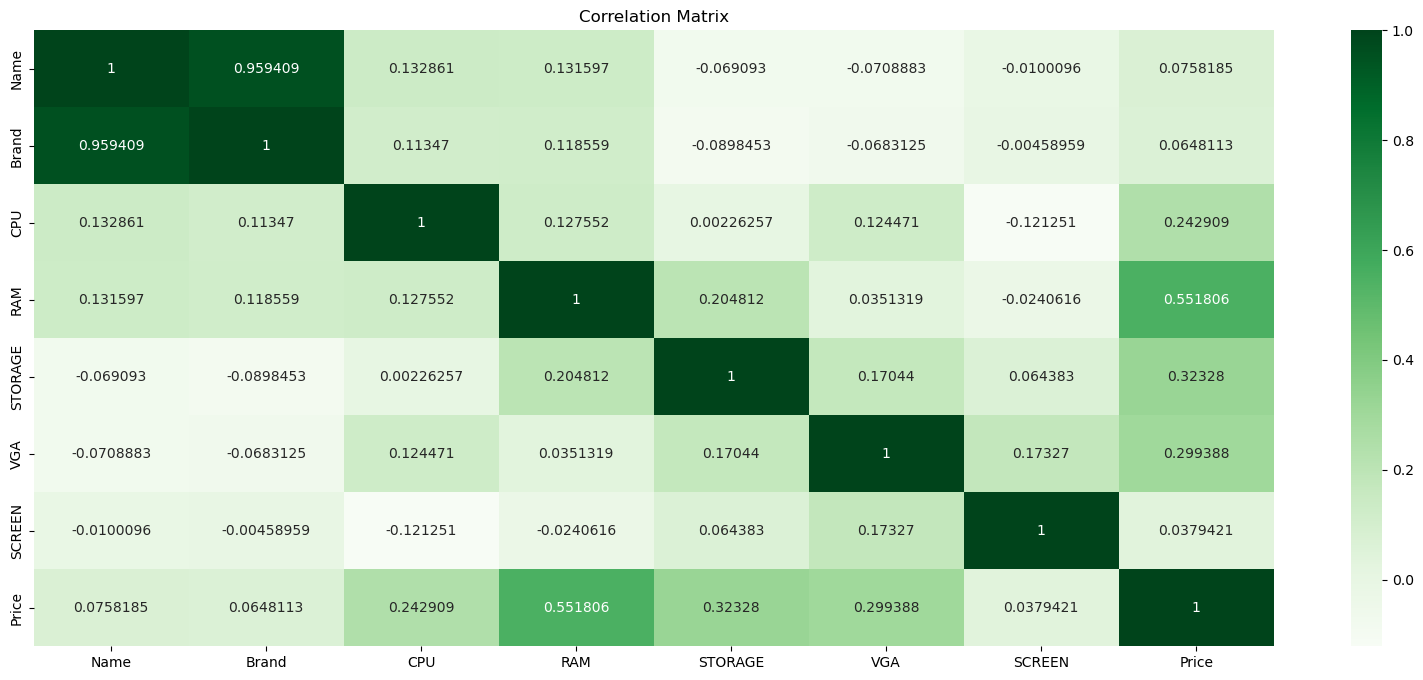

In [9]:
# Plot the correlation matrix heatmap
fig, ax= plt.subplots(1,1,figsize = (20,8))
title= ax.set_title("Correlation Matrix")
c= sns.heatmap(data.corr(),annot=True,fmt="g",cmap="Greens")

In [10]:
# Huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4800\263208915.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


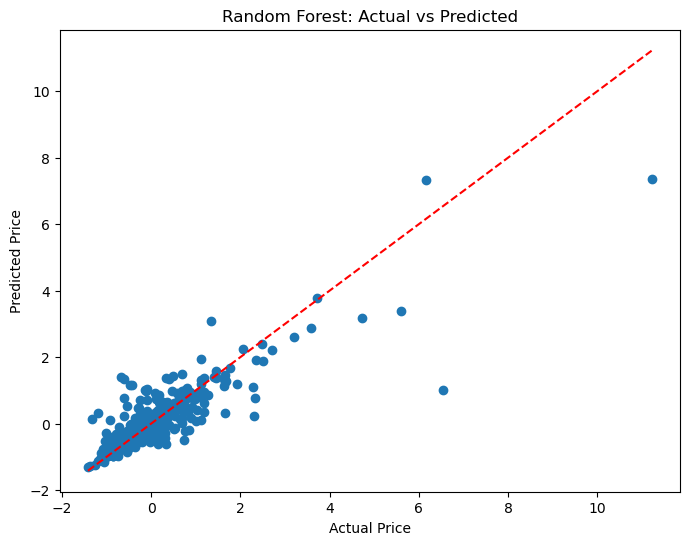

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

In [12]:
# Huấn luyện mô hình Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


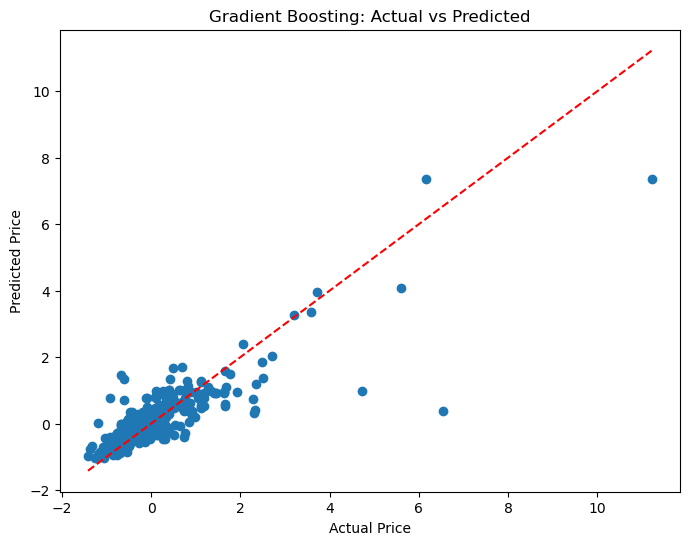

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.show()

In [14]:
# Huấn luyện mô hình Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

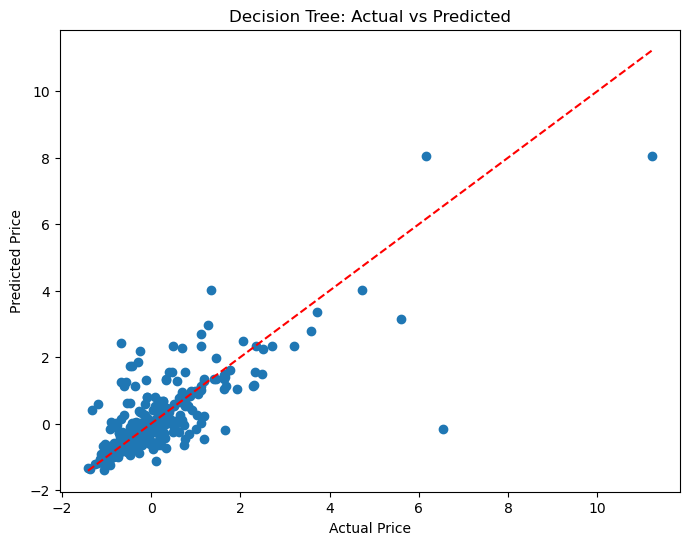

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,dt_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree: Actual vs Predicted')
plt.show()

In [16]:
# Huấn luyện mô hình Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


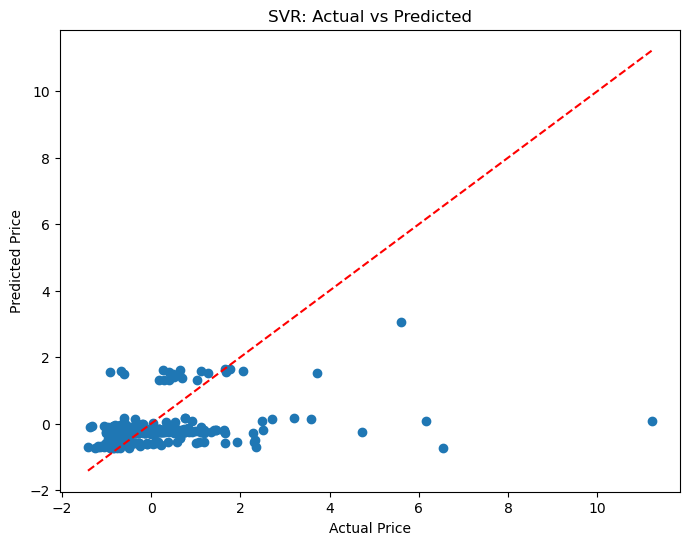

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svr_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('SVR: Actual vs Predicted')
plt.show()

In [18]:
# Huấn luyện mô hình Neural Network
nn_model = MLPRegressor()
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


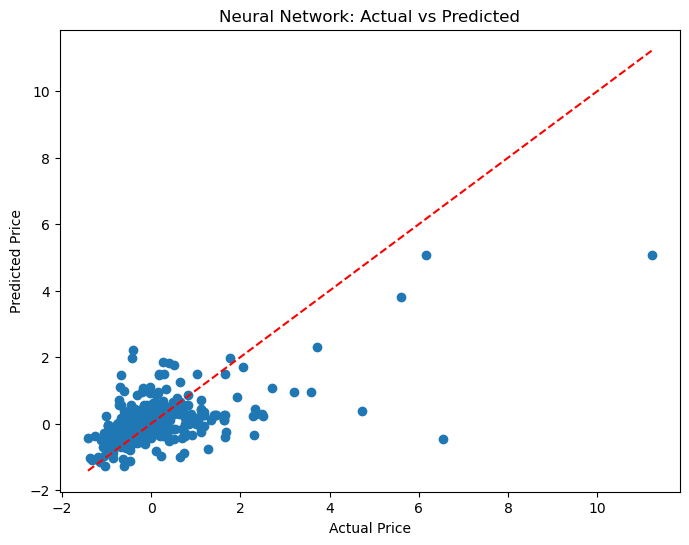

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, nn_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Neural Network: Actual vs Predicted')
plt.show()

In [20]:
# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

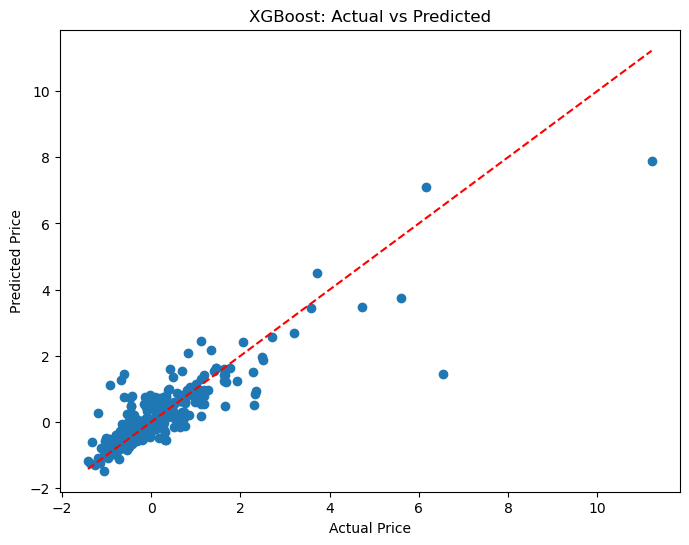

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost: Actual vs Predicted')
plt.show()

In [22]:
# Huấn luyện mô hình K-nearest Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

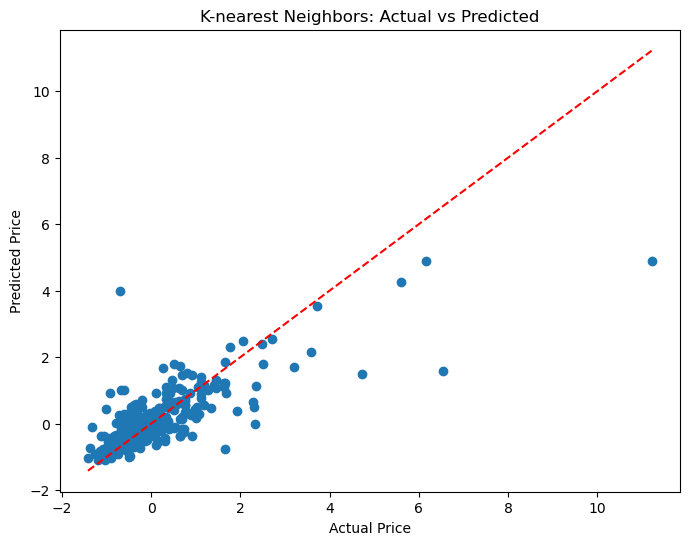

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('K-nearest Neighbors: Actual vs Predicted')
plt.show()

In [24]:
# Huấn luyện mô hình
bagging_model = BaggingRegressor()
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


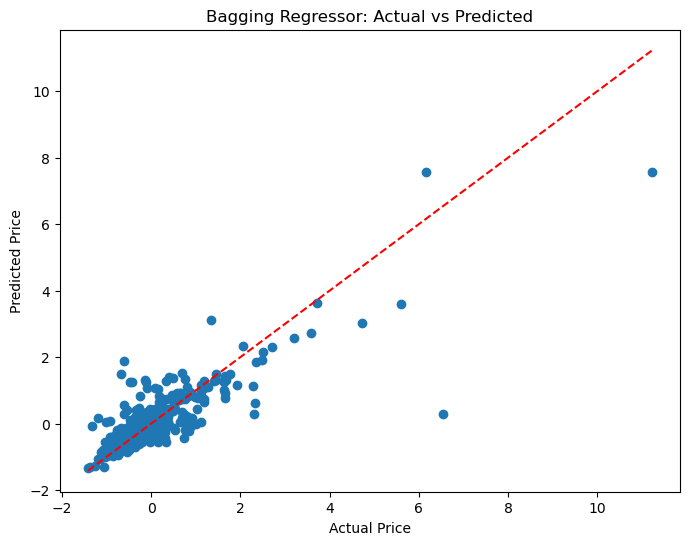

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, bagging_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Bagging Regressor: Actual vs Predicted')
plt.show()

In [26]:
models = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'Support Vector Regression', 'Neural Network', 'XGBoost', 'K-nearest Neighbors', 'Bagging Regressor']
predictions = [rf_predictions, gb_predictions, dt_predictions, svr_predictions, nn_predictions, xgb_predictions, knn_predictions, bagging_predictions]
evaluation_results = []

for model, preds in zip(models, predictions):
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    evaluation_results.append({'Model': model, 'Mean Squared Error': mse, 'R-squared Score': r2})

df_evaluation = pd.DataFrame(evaluation_results)

# Hiển thị bảng đánh giá
print(df_evaluation)


                       Model  Mean Squared Error  R-squared Score
0              Random Forest            0.318614         0.740580
1          Gradient Boosting            0.357529         0.708895
2              Decision Tree            0.471242         0.616308
3  Support Vector Regression            1.151461         0.062464
4             Neural Network            0.776188         0.368017
5                    XGBoost            0.260904         0.787568
6        K-nearest Neighbors            0.464143         0.622088
7          Bagging Regressor            0.352951         0.712623


## Lựa chọn model
nên quan tâm đến độ chính xác của mô hình, nên chọn mô hình có R-squared Score cao và Mean Squared Error thấp => XGBoost  

In [27]:
data.head(100)


,Name,Brand,CPU,RAM,STORAGE,VGA,SCREEN,Price,Store,LINK
0,1840,14,12,8,256,20,13.3,18490000,CellPhoneS,https://cellphones.com.vn/macbook-air-2020-m1....
1,1882,14,13,8,256,14,13.0,27890000,CellPhoneS,https://cellphones.com.vn/macbook-air-m2-2022....
2,339,2,3,8,512,4,14.0,17990000,CellPhoneS,https://cellphones.com.vn/laptop-asus-gaming-r...
3,1827,14,13,8,256,14,16.0,14790000,CellPhoneS,https://cellphones.com.vn/mac-mini-m2-2023.html
4,1439,12,2,8,512,26,15.6,21990000,CellPhoneS,https://cellphones.com.vn/laptop-lenovo-ideapa...
...,...,...,...,...,...,...,...,...,...,...
95,1526,12,13,8,512,2,14.0,19990000,CellPhoneS,https://cellphones.com.vn/laptop-lenovo-thinkp...
96,594,2,10,16,512,9,14.0,26690000,CellPhoneS,https://cellphones.com.vn/laptop-asus-zenbook-...
97,1273,11,9,8,256,9,14.0,19990000,CellPhoneS,https://cellphones.com.vn/laptop-lg-gram-2022-...
98,1825,14,13,24,256,14,16.0,25990000,CellPhoneS,https://cellphones.com.vn/mac-mini-m2-24gb-202...


In [28]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# Đưa thông tin về sản phẩm mới vào DataFrame
new_product = pd.DataFrame({
    'Name': ['1840'],
    'Brand': ['14'],
    'CPU': ['12'],
    'RAM': [8],
    'STORAGE': [256],
    'SCREEN': ['13.3']
})


# Dự đoán giá sản phẩm mới bằng mô hình Random Forest
predicted_price = gb_model.predict(new_product)

# Tìm cửa hàng có giá sản phẩm thấp nhất trong tập dữ liệu
min_price_index = xgb_predictions.argmin()
selected_store = data.loc[min_price_index, 'Store']
selected_link = data.loc[min_price_index, 'LINK']

# In ra cửa hàng có giá thấp nhất và link của cửa hàng đó
print("Cửa hàng có giá thấp nhất:", selected_store)
print("Link của cửa hàng:", selected_link)

Cửa hàng có giá thấp nhất: CellPhoneS
Link của cửa hàng: https://cellphones.com.vn/laptop-dell-insprion-15-3511-70270652.html
